<a href="https://colab.research.google.com/github/Mercy-Kamau/Polycystic-Ovary-Syndrome-Detection-Using-Ultrasound-Images-and-Convolutional-Neural-Networks-/blob/main/PCOS_Detection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mounts the google drive where i'll retrieve my dataset

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Install python dependancies. Import the opensource framework 

In [2]:

#!pip3 install keras==2.1.6
#! pip install tensorflow==2.2.1
! pip install --upgrade tensorflow 
! pip install tf-nightly 
! pip install --upgrade tensorflow
! pip install --upgrade keras
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 19 kB/s 
     |████████████████████████████████| 6.0 MB 42.9 MB/s 
     |████████████████████████████████| 439 kB 59.6 MB/s 
     |████████████████████████████████| 1.7 MB 42.1 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

### import and ignore warnings

In [3]:
import warnings 
warnings.filterwarnings('ignore') #ignores warnings 

In [4]:
#! pip install tensorflow==2.2.1
! pip install --upgrade tensorflow 
! pip install --upgrade keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import tensorflow as tf


In [6]:
directory = '/content/gdrive/MyDrive/pcos-detection-using-ultrasound-images/data'

### Import Necessary Libraries 

In [7]:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.utils import load_img
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.layers import MaxPooling2D
from keras.models import Sequential #input is provided one after the other 
from keras_preprocessing.image import load_img, img_to_array
#import keras
import cv2 
import numpy as np
import os #will be important to get files and their directories 
import pandas as pd 
import matplotlib.pyplot as plt
import math #for mathematical computations 
import shutil #helps in automating process of copying and removal of files and directories and moving files from one folder to the other 
import glob #helps to return all file paths that follow a specific pattern 
print (tf.__version__)

2.12.0-dev20221201


### Count the number of images belonging in each class

In [8]:
os.listdir('/content/gdrive/MyDrive/pcos-detection-using-ultrasound-images/data')

['train', 'test']

In [9]:
Root_directory = "/content/gdrive/MyDrive/pcos-detection-using-ultrasound-images/data"
#create a dictionary 
number_of_images = {}
#dir is the name of the folder 
for dir in os.listdir(Root_directory):
  number_of_images[dir] =len(os.listdir(os.path.join(Root_directory, dir)))


In [ ]:
# def dataFolder(path,split):
#   if not os.path.exists("./"+path):
#     os.mkdir("./"+path)
#     for dir in os.listdir(Root_directory):
#       os.makedirs("./"+path+"/"+dir)
#       for img in np.random.choice(a = os.listdir(os.path.join(Root_directory, dir)),
#                                   size = (math.floor(split*number_of_images[dir])-5),
#                                   replace = False ):
#         Original = os.path.join(Root_directory, dir , img)
#         Destination = os.path.join("./"+path,dir)
#         shutil.copy(Original,Destination)
#         os.remove(Original)
#     else:
#       print(f"{path}Folder Exist")#
      


In [ ]:
# dataFolder("Validation", 0.15)

In [10]:
#shows the number of images 
number_of_images.items()

dict_items([('train', 2), ('test', 2)])

### list images labeled infected in the test folder

In [11]:
#os.listdir('/content/gdrive/MyDrive/pcos-detection-using-ultrasound-images/data/test/infected')
len(os.listdir('/content/gdrive/MyDrive/pcos-detection-using-ultrasound-images/data/test/infected'))

787

### list images labeled notinfected in the test folder
```



In [12]:
#os.listdir('/content/gdrive/MyDrive/pcos-detection-using-ultrasound-images/data/test/notinfected')
len(os.listdir('/content/gdrive/MyDrive/pcos-detection-using-ultrasound-images/data/test/notinfected'))

1145

List images labeled infected in the train folder 

In [13]:
#os.listdir('/content/gdrive/MyDrive/pcos-detection-using-ultrasound-images/data/train/infected')
len(os.listdir('/content/gdrive/MyDrive/pcos-detection-using-ultrasound-images/data/train/infected'))

781

list images labeled not infected in the train folder 

In [14]:
#os.listdir('/content/gdrive/MyDrive/pcos-detection-using-ultrasound-images/data/train/notinfected')
len(os.listdir('/content/gdrive/MyDrive/pcos-detection-using-ultrasound-images/data/train/infected'))

781

### Image data preprocessing 

In [15]:
directory = '/content/gdrive/MyDrive/pcos-detection-using-ultrasound-images/data/train'

In [16]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory (
    directory, #where the data is located
    labels="inferred",#shows that the directory has subdirectories containing images.
    label_mode="binary", #the labels are encoded as float32 scalars with values 0 or 1 that is infected or not infected
    class_names=None, #controls the order of classes
    color_mode="rgb",
    batch_size=32,
    image_size=(224,224),#resize image to 224,224 after reading from disk
    shuffle=True,
    seed=24, #random seed for data transformation and shuffling 
    validation_split=None,
    subset=None,
    interpolation="bilinear",#method to use when resizing images 
    follow_links=True,
    crop_to_aspect_ratio=False,
)

Found 1924 files belonging to 2 classes.


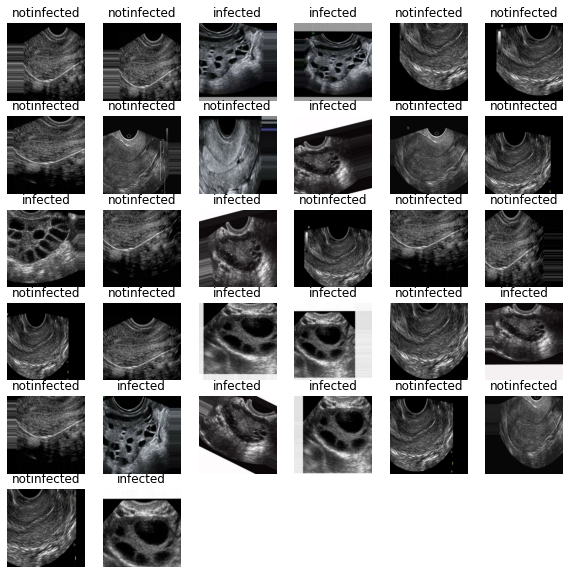

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
class_names = train_dataset.class_names
for images, labels in train_dataset.take(2):
    for i in range(32):
        ax = plt.subplot(6, 6, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")

In [95]:
# def preprocessingImages(path):
  #"""input : path 
    # output : pre preprocessed images 
  #"""
from tensorflow.keras.preprocessing.image import ImageDataGenerator
  #create a generator
image_data = ImageDataGenerator(zoom_range=0.2, 
                                  shear_range=0.2,
                                  rescale = 1/255, 
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  rotation_range=30,
                                  validation_split=0.3,
                                  fill_mode='nearest'
                                  ) #for data augmentation and increasing dimension
image = image_data.flow_from_directory(directory, 
                                         target_size = (224,224), 
                                         batch_size = 32,
                                         class_mode = 'binary',
                                        # classes =['infected', 'noninfected'],
                                         subset = 'training',
                                         seed = 24,
                                      
                                         )
validation_iterator = image_data.flow_from_directory(directory,
                                                       class_mode = 'binary',
                                                       #classes = ['infected', 'notinfected'],
                                                       target_size = (224,224),
                                                       batch_size = 32,
                                                       subset = 'validation',
                                                       seed = 24,
                                                       )
  # return image
# """
# rescale is for data normalization
# we are performing indepth analysis of the images 
# """


SyntaxError: ignored

In [94]:
batchX, batchY = image.next()
print('Batch shape=%s, min=%.3f, max=%.3f' %(batchY.shape, batchY.min(), batchY.max()))
print('Batch shape=%s, min=%.3f, max=%.3f' %(batchX.shape, batchX.min(), batchX.max()))

Batch shape=(32,), min=0.000, max=0.000
Batch shape=(32, 224, 224, 3), min=0.000, max=1.000


## The Convolutional Neural Network

In [20]:
# #creating the variable
model1 = Sequential()

model1.add(Conv2D(filters=16, kernel_size=(5,5),padding='valid', activation='relu', input_shape =(224,224,3) )) #SIZE OF IMAGE IS 224 * 224 IN 3 CHANNELS
#model1.add(MaxPool2D(pool_size=(4,4)))

model1.add(Conv2D(filters=36, kernel_size=(5,5),padding='valid' , activation='relu' ))
model1.add(MaxPool2D(pool_size=(4,4)))

model1.add(Conv2D(filters= 64, kernel_size=(5,5),padding='valid' , activation='relu'))
model1.add(MaxPool2D(pool_size=(4,4)))

model1.add(Conv2D(filters= 128, kernel_size=(5,5),padding='valid' , activation='relu'))
model1.add(MaxPool2D(pool_size=(4,4)))
#adding a dropout layer
model1.add(Dropout(rate= 0.25))
model1.add(Flatten())
# model1.add(Dense(units=64, activation= 'relu'))
# model1.add(Dropout(rate = 0.25))
model1.add(Dense(units=1, activation = 'sigmoid')) #give probability of output whether its one or 0

# model1 = Sequential()
# model1.add(Conv2D(10, (5,5),padding='valid',activation='relu',input_shape=(224,224,3)))
# model1.add(MaxPooling2D(pool_size=(4,4)))
# # REPEAT CONV AND POOLING layer 3 TIMES
# model1.add(Conv2D(12, (5,5),padding='valid',activation='relu'))
# model1.add(MaxPooling2D(pool_size=(4,4)))
# #model1.add(Conv2D(128, (5,5),padding='valid',activation='relu'))
# # model1.add(Conv2D(256, (5,5),padding='valid',activation='relu'))
# # model1.add(MaxPooling2D(pool_size=(4,4)))
# model1.add(Flatten())
# #model1.add(Dense(128,activation='relu'))
# #model1.add(Dense(64,activation='relu'))
# model1.add(Dense(2,activation='softmax'))

           

In [21]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 16)      1216      
                                                                 
 conv2d_1 (Conv2D)           (None, 216, 216, 36)      14436     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 54, 54, 36)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        57664     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         2

In [22]:
model1.compile(optimizer = 'adam', 
              loss = keras.losses.binary_crossentropy ,
              metrics=['accuracy']
              )

In [23]:
history = model1.fit(
    image,
    steps_per_epoch= 8,
    validation_data = validation_iterator,
    validation_steps = 16,
    epochs = 5
)

Epoch 1/5
8/8 [==============================] - 259s 34s/step - loss: 0.6814 - accuracy: 0.5742 - val_loss: 0.6529 - val_accuracy: 0.5918
Epoch 2/5
8/8 [==============================] - 117s 14s/step - loss: 0.5949 - accuracy: 0.6484 - val_loss: 0.4180 - val_accuracy: 0.9766
Epoch 3/5
8/8 [==============================] - 108s 13s/step - loss: 0.2606 - accuracy: 0.9492 - val_loss: 0.2357 - val_accuracy: 0.8926
Epoch 4/5
8/8 [==============================] - 103s 13s/step - loss: 0.0648 - accuracy: 0.9805 - val_loss: 0.0499 - val_accuracy: 0.9863


We preprocess the images by creating a function 

In [24]:
#plotting errors and model graphical interpretation 
graph_history = history.history
graph_history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

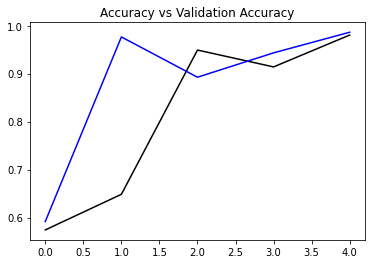

In [25]:
import matplotlib.pyplot as plt 

plt.plot (graph_history['accuracy'] , color = "black")
plt.plot ( graph_history['val_accuracy'], color = "blue")

plt.title("Accuracy vs Validation Accuracy")
plt.show()

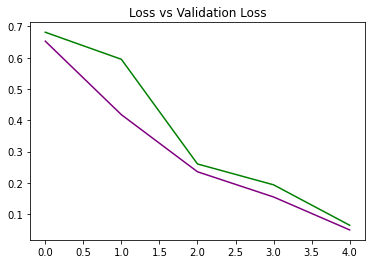

In [26]:
plt.plot (graph_history['loss'] , color = "green")
plt.plot ( graph_history['val_loss'], color = "purple")

plt.title("Loss vs Validation Loss")
plt.show()

In [27]:
def preprocessingImages(path):
  """input : path 
     output : pre preprocessed images 
  """
  image_data = ImageDataGenerator(rescale = 1/255) #for data augmentation and increasing dimension
  image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32,class_mode = 'binary')
  return image

In [28]:
path = "/content/gdrive/MyDrive/pcos-detection-using-ultrasound-images/data/train"
train_data = preprocessingImages(path) 

Found 1924 images belonging to 2 classes.


In [29]:
def preprocessingImages2(path):
  """input : path 
     output : pre preprocessed images 
  """
  image_data = ImageDataGenerator(rescale = 1/255) #for data augmentation and increasing dimension
  image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32,class_mode = 'binary')
  return image

In [30]:
path = "/content/gdrive/MyDrive/pcos-detection-using-ultrasound-images/data/test"
test_data = preprocessingImages2(path)

Found 1932 images belonging to 2 classes.


Early stopping and Model check point 

In [44]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#early stopping
#Early_stopping=EarlyStopping(monitor = "val_accuracy", min_delta=0.01, patience=3, verbose=1, mode='auto')
# # #model check point
# Model_checkpoint=ModelCheckpoint(monitor = "val_accuracy", filepath="/content/model.h5", verbose=1, save_best_only=True,mode='auto')
# cd = [Early_stopping, Model_checkpoint]

# tf.keras.callbacks.EarlyStopping(
#     monitor="val_loss",
#     min_delta=0,
#     patience=0,
#     verbose=0,
#     mode="auto",
#     baseline=None,
#     restore_best_weights=False,
# )
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy", min_delta=0.01, patience=3, verbose=1, mode='auto'),
    tf.keras.callbacks.ModelCheckpoint(monitor = "val_accuracy", filepath="/content/model.h5", verbose=1, save_best_only=True,mode='auto')
]


## Model Training

In [93]:
from tensorflow.keras import Model
# history = keras.fit_generator(self,
#                               generator = image_data, 
#                                steps_per_epoch=8,
#                               epochs = 30,
#                                verbose = 1, #displays whatever execution is happening
#                               validation_data= validation_iterator,
#                                validation_steps=16,
#                                callbacks= my_callbacks)
history = model.fit(   image_data,
                        steps_per_epoch=8,
                        epochs = 30,
                        verbose = 1, #displays whatever execution is happening
                        validation_data= validation_iterator,
                        validation_steps=16,
                        callbacks= my_callbacks

    
)

ValueError: ignored

In [31]:
#creating the variable
model2 = Sequential()

model2.add(Conv2D(filters=16, kernel_size=(6,6),padding='valid', activation='relu', input_shape =(224,224,3) )) #SIZE OF IMAGE IS 224 * 224 IN 3 CHANNELS
model2.add(MaxPool2D(pool_size=(6,6)))

model2.add(Conv2D(filters=12, kernel_size=(5,5),padding='valid' , activation='relu' ))
model2.add(MaxPool2D(pool_size=(5,5)))

model2.add(Conv2D(filters= 10, kernel_size=(3,3),padding='valid' , activation='relu'))
model2.add(MaxPool2D(pool_size=(3,3)))

# model2.add(Conv2D(15, (5,5),padding='valid',activation='relu'))
# model2.add(MaxPooling2D(pool_size=(5,5)))
#adding a dropout layer
#model2.add(Dropout(rate= 0.25))
model2.add(Flatten())
# model2.add(Dense(units=64, activation= 'relu'))
# model2.add(Dropout(rate = 0.25))
model2.add(Dense(units=1, activation = 'sigmoid')) #give probability of output whether its one or 0

# model2 = Sequential() #give probability of output whether its one or 0


In [32]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 219, 219, 16)      1744      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 12)        4812      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 12)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 10)          1090      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 10)        

In [34]:
model2.compile(optimizer = 'adam', 
              loss = keras.losses.binary_crossentropy,
              metrics=['accuracy']
              )

In [35]:
history = model2.fit(
          image,
          validation_data = validation_iterator,
          epochs = 8
)

Epoch 1/8
43/43 [==============================] - 97s 2s/step - loss: 0.5933 - accuracy: 0.7433 - val_loss: 0.4083 - val_accuracy: 0.7969
Epoch 2/8
43/43 [==============================] - 93s 2s/step - loss: 0.2002 - accuracy: 0.9414 - val_loss: 0.1339 - val_accuracy: 0.9583
Epoch 3/8
43/43 [==============================] - 98s 2s/step - loss: 0.0904 - accuracy: 0.9703 - val_loss: 0.0858 - val_accuracy: 0.9688
Epoch 4/8
43/43 [==============================] - 99s 2s/step - loss: 0.0477 - accuracy: 0.9889 - val_loss: 0.0354 - val_accuracy: 0.9896
Epoch 5/8
43/43 [==============================] - 94s 2s/step - loss: 0.0419 - accuracy: 0.9852 - val_loss: 0.0340 - val_accuracy: 0.9913
Epoch 6/8
43/43 [==============================] - 94s 2s/step - loss: 0.0261 - accuracy: 0.9918 - val_loss: 0.0212 - val_accuracy: 0.9948
Epoch 7/8
43/43 [==============================] - 97s 2s/step - loss: 0.0205 - accuracy: 0.9941 - val_loss: 0.0162 - val_accuracy: 0.9965
Epoch 8/8
43/43 [==========

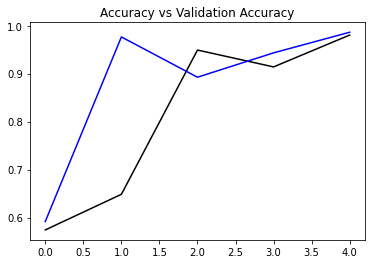

In [36]:
plt.plot (graph_history['accuracy'] , color = "black")
plt.plot ( graph_history['val_accuracy'], color = "blue")

plt.title("Accuracy vs Validation Accuracy")
plt.show()

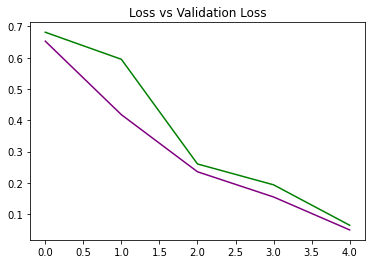

In [37]:
plt.plot (graph_history['loss'] , color = "green")
plt.plot ( graph_history['val_loss'], color = "purple")

plt.title("Loss vs Validation Loss")
plt.show()

In [38]:
model3 = Sequential()

model3.add(Conv2D(10, (5,5),padding='valid',activation='relu',input_shape=(224,224,3)))
model3.add(MaxPooling2D(pool_size=(4,4)))

model3.add(Conv2D(12, (5,5),padding='valid',activation='relu'))
model3.add(MaxPooling2D(pool_size=(4,4)))

model3.add(Conv2D(5, (3,3),padding='valid',activation='relu'))
# model3.add(Conv2D(256, (5,5),padding='valid',activation='relu'))
model3.add(MaxPooling2D(pool_size=(3,3)))

model3.add(Flatten())
#model3.add(Dense(128,activation='relu'))
#model3.add(Dense(64,activation='relu'))
model3.add(Dense(1,activation='sigmoid'))

In [39]:
model3.compile(
  optimizer='adam',
  loss=keras.losses.binary_crossentropy,
  metrics=['accuracy'])

In [40]:
history = model3.fit( 
  image,
  validation_data=validation_iterator,
  epochs=6)

Epoch 1/6
43/43 [==============================] - 94s 2s/step - loss: 0.6300 - accuracy: 0.6550 - val_loss: 0.5415 - val_accuracy: 0.7118
Epoch 2/6
43/43 [==============================] - 87s 2s/step - loss: 0.3540 - accuracy: 0.8709 - val_loss: 0.1907 - val_accuracy: 0.9358
Epoch 3/6
43/43 [==============================] - 90s 2s/step - loss: 0.1343 - accuracy: 0.9629 - val_loss: 0.0869 - val_accuracy: 0.9705
Epoch 4/6
43/43 [==============================] - 88s 2s/step - loss: 0.0832 - accuracy: 0.9733 - val_loss: 0.1301 - val_accuracy: 0.9514
Epoch 5/6
43/43 [==============================] - 85s 2s/step - loss: 0.0648 - accuracy: 0.9800 - val_loss: 0.0316 - val_accuracy: 0.9965
Epoch 6/6
43/43 [==============================] - 86s 2s/step - loss: 0.0286 - accuracy: 0.9926 - val_loss: 0.0325 - val_accuracy: 0.9913


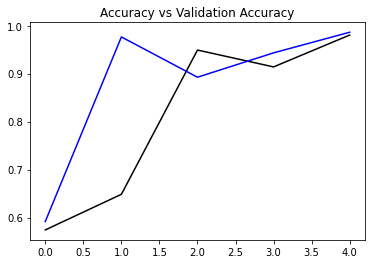

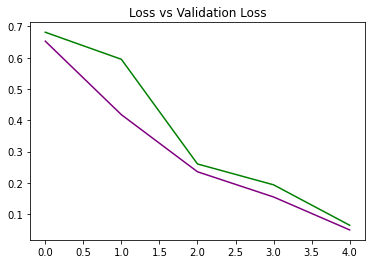

In [41]:
plt.plot (graph_history['accuracy'] , color = "black")
plt.plot ( graph_history['val_accuracy'], color = "blue")

plt.title("Accuracy vs Validation Accuracy")
plt.show()

plt.plot (graph_history['loss'] , color = "green")
plt.plot ( graph_history['val_loss'], color = "purple")

plt.title("Loss vs Validation Loss")
plt.show()

In [42]:
model5 = Sequential()

model5.add(Conv2D(15, (5,5),padding='valid',activation='relu',input_shape=(224,224,3)))
model5.add(MaxPooling2D(pool_size=(5,5)))

model5.add(Conv2D(12, (4,4),padding='valid',activation='relu'))
model5.add(MaxPooling2D(pool_size=(4,4)))

model5.add(Conv2D(8, (3,3),padding='valid',activation='relu'))
# model5.add(Conv2D(256, (5,5),padding='valid',activation='relu'))
model5.add(MaxPooling2D(pool_size=(3,3)))
model5.add(Flatten())
#model5.add(Dense(128,activation='relu'))
#model5.add(Dense(64,activation='relu'))
model5.add(Dense(1,activation='sigmoid'))

In [60]:
model5.compile(
  optimizer='adam',
  loss=keras.losses.binary_crossentropy,
  metrics=['accuracy'])

In [61]:
history = model5.fit( 
  image,
  validation_data=validation_iterator,
  epochs=7)

Epoch 1/7
43/43 [==============================] - 93s 2s/step - loss: 0.6406 - accuracy: 0.6387 - val_loss: 0.5714 - val_accuracy: 0.7639
Epoch 2/7
43/43 [==============================] - 87s 2s/step - loss: 0.4734 - accuracy: 0.7886 - val_loss: 0.3577 - val_accuracy: 0.8698
Epoch 3/7
43/43 [==============================] - 96s 2s/step - loss: 0.2577 - accuracy: 0.9088 - val_loss: 0.2226 - val_accuracy: 0.9132
Epoch 4/7
43/43 [==============================] - 90s 2s/step - loss: 0.1530 - accuracy: 0.9429 - val_loss: 0.1026 - val_accuracy: 0.9670
Epoch 5/7
43/43 [==============================] - 98s 2s/step - loss: 0.1236 - accuracy: 0.9525 - val_loss: 0.0957 - val_accuracy: 0.9670
Epoch 6/7
43/43 [==============================] - 96s 2s/step - loss: 0.0855 - accuracy: 0.9688 - val_loss: 0.0726 - val_accuracy: 0.9792
Epoch 7/7
43/43 [==============================] - 89s 2s/step - loss: 0.0673 - accuracy: 0.9770 - val_loss: 0.0455 - val_accuracy: 0.9844


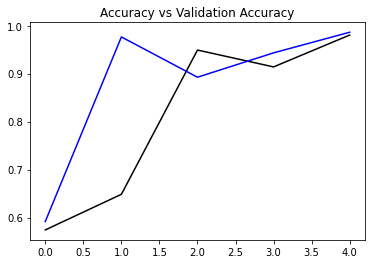

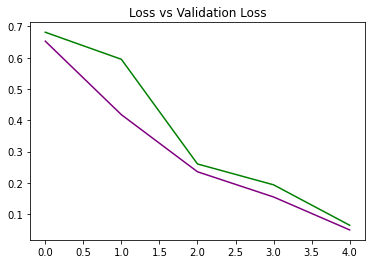

In [70]:
plt.plot (graph_history['accuracy'] , color = "black")
plt.plot ( graph_history['val_accuracy'], color = "blue")

plt.title("Accuracy vs Validation Accuracy")
plt.show()

plt.plot (graph_history['loss'] , color = "green")
plt.plot ( graph_history['val_loss'], color = "purple")

plt.title("Loss vs Validation Loss")
plt.show()

### Saving Best Model

In [71]:
model2.save('model.h5')

In [77]:
#Graphical interpretation
h = history.history
h.keys()



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

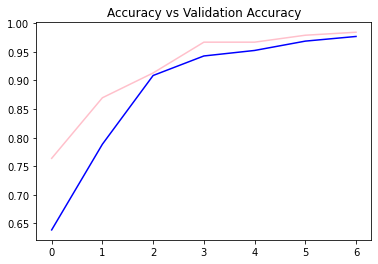

In [78]:
import matplotlib.pyplot as plt
plt.plot(h['accuracy'], color = "blue")
plt.plot(h['val_accuracy'], color = "pink")

plt.title("Accuracy vs Validation Accuracy")
plt.show()


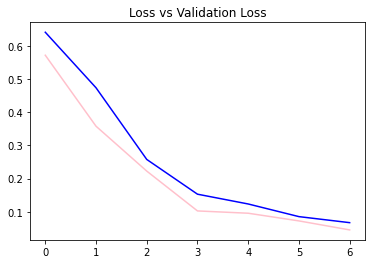

In [79]:
import matplotlib.pyplot as plt
plt.plot(h['loss'], color = "blue")
plt.plot(h['val_loss'], color = "pink")

plt.title("Loss vs Validation Loss")
plt.show()


## Model Accuracy

In [ ]:
model2.save('model.h5')

In [80]:
from tensorflow import keras
from keras.models import load_model
model =load_model('/content/model.h5')

In [99]:
accuracy = model.evaluate(validation_iterator)[1]
print(f"The Accuracy of the Model is{accuracy}")
print(f"The Accuracy of the Model is{accuracy*100}%")

18/18 [==============================] - 18s 966ms/step - loss: 0.0110 - accuracy: 0.9965
The Accuracy of the Model is0.9965277910232544
The Accuracy of the Model is99.65277910232544%


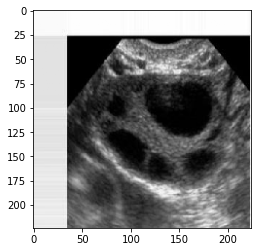

1/1 [==============================] - 0s 78ms/step
the xray has PCOS


In [88]:
from tensorflow.keras.utils import load_img, img_to_array
#from keras.preprocessing.image import load_img,img_to_array
path = "/content/gdrive/MyDrive/pcos-detection-using-ultrasound-images/data/test/infected/img_0_1033.jpg"
img = load_img(path, target_size =(224,224))
input_array = img_to_array(img)/255 #for image normalization 
plt.imshow(input_array)
plt.show()

input_array.shape
input_array = np.expand_dims(input_array, axis = 0)

#prediction = model.predict_classes(input_array)[0][0]
prediction = (model.predict(input_array) > 0.5).astype("int32")
prediction
if prediction == 0:
  print("the xray has PCOS")
else:
  print("the Xray doesnt have PCOS")


ImportError: ignored

In [ ]:
train_data.class_indices

## Transfer Learning

In [ ]:
from tensorflow.keras.utils import load_img
import numpy as np
image = load_img('/content/drive/MyDrive/pcos-detection-using-ultrasound-images/data/test/infected/img_0_1553.jpg')
img = np.array(image)
img = img/255.0
img = np.array([1 for i in range(270000)], dtype=np.int8)
img.size
#img.reshape((1, 32, 32, 3))
#270000 != 1*32*32*3
#True
#img = img.reshape(1,224,224,3)
#prediction = model.predict(img)

In [ ]:
type(prediction)

In [ ]:
print(prediction)

In [ ]:
l={"infected":prediction[0][0],"notinfected":prediction[0][1]}
def get_key(val):
  for key, value in l.items():
    if val == value:
      return keys
  return "key doesn't exist"

In [ ]:
j=prediction.max()
get_key(j)